In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
from crawto.CrawtoDS import CrawtoDS

In [4]:
df = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
c = CrawtoDS(
    data=df,
    test_data=test,
    target="Survived",
    problem='binary classification'
)

In [5]:
c.nan_report()

,Percent of data encoded NAN
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


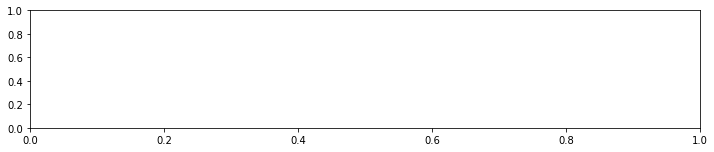

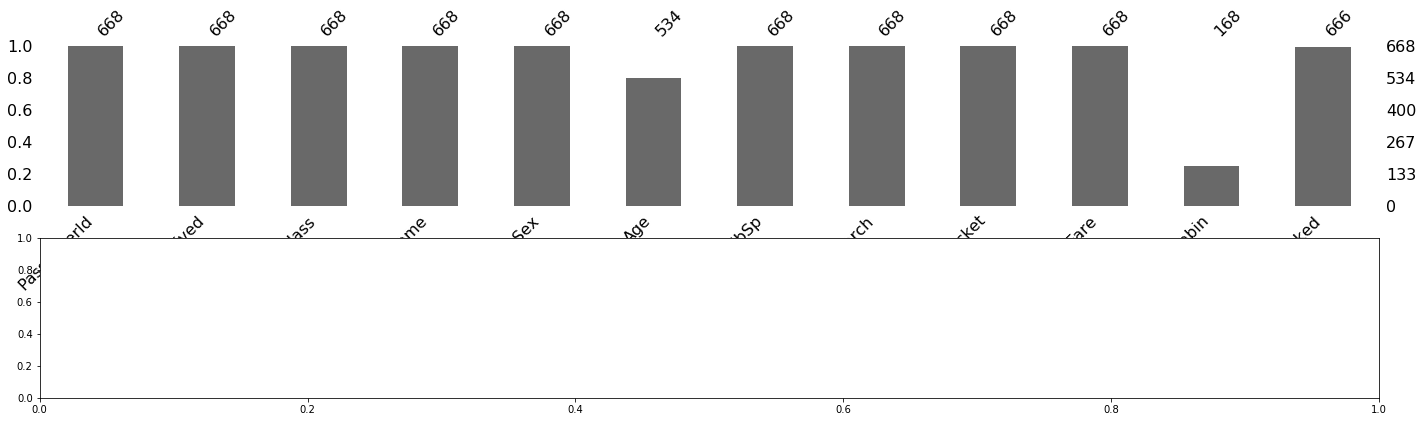

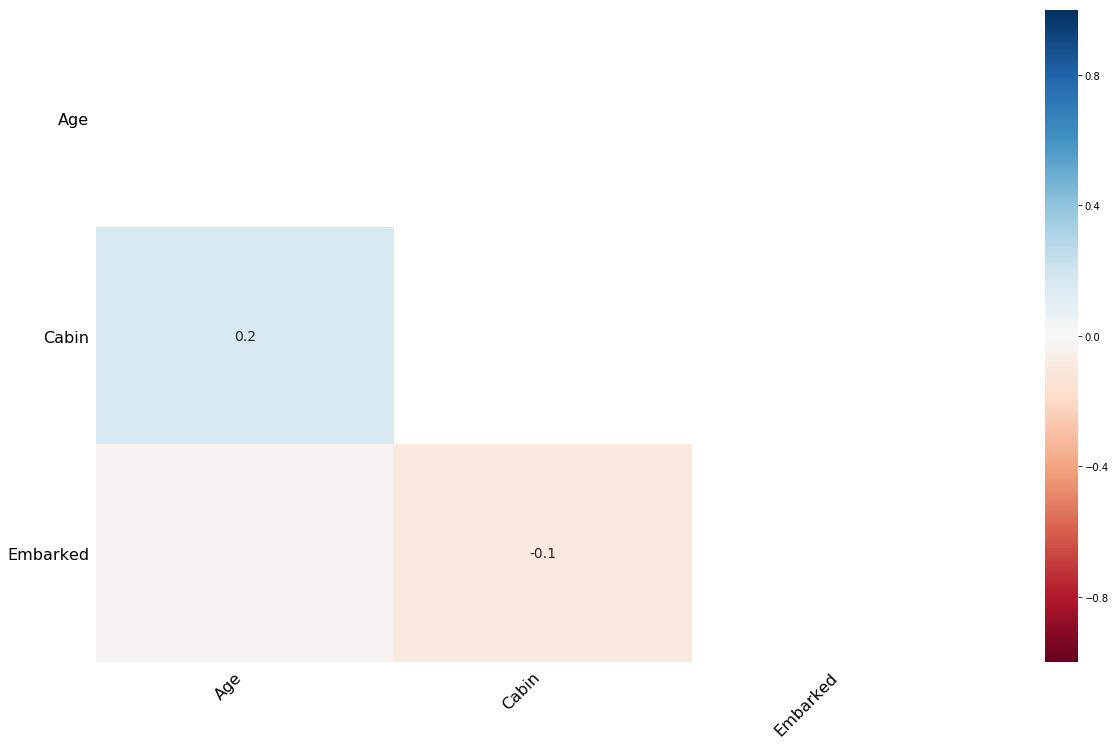

In [6]:
c.missing_suite()

In [7]:
c.skew_report()

There are 0 highly skewed data columns. Please check them for miscoded na's
[]


'No Features are correlated above the threshold'

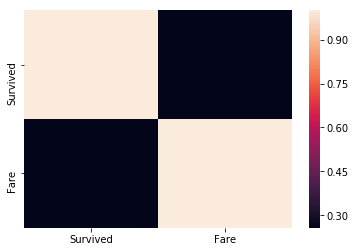

In [8]:
c.correlation_report()

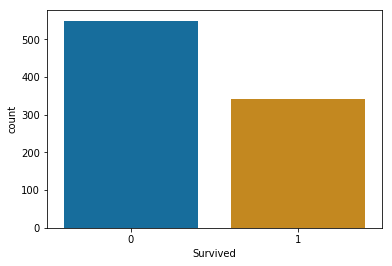

In [9]:
c.target_distribution_report()

In [10]:
c.tsne()

AttributeError: 'CrawtoDS' object has no attribute 'tsne'

In [ ]:
#c.categorical_bar_plots()

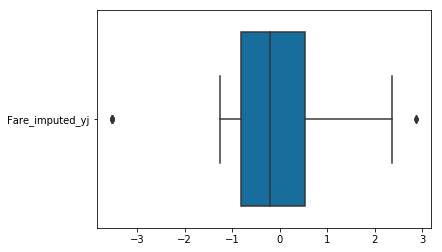

In [11]:
c.numeric_boxplot()

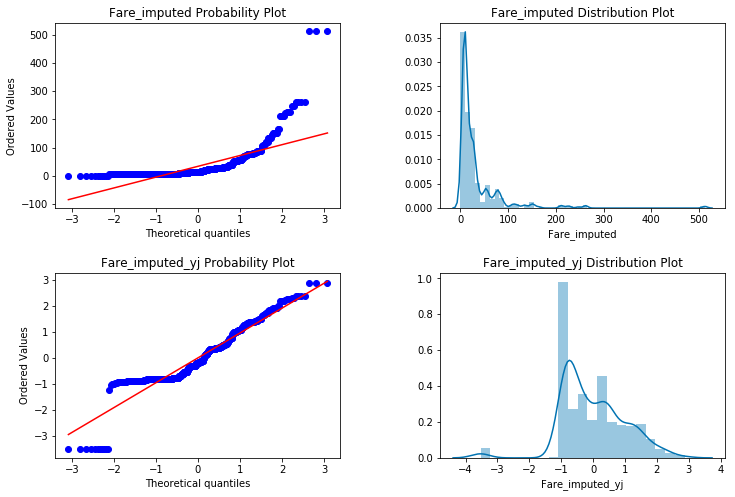

In [12]:
c.probability_plots()

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       137
           1       0.00      0.00      0.00        86

    accuracy                           0.61       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.38      0.61      0.47       223



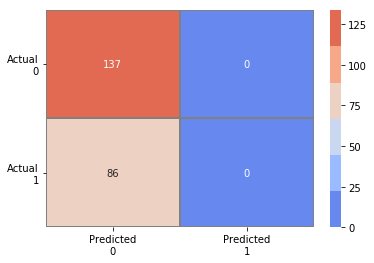

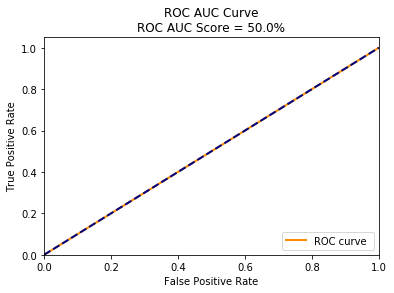

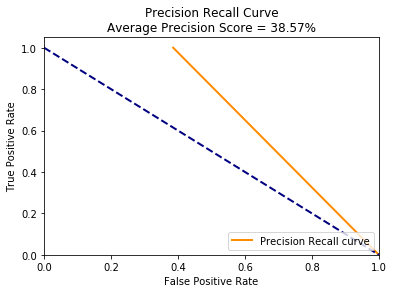

In [13]:
c.baseline_prediction()

In [94]:
 p, y_true,y_pred= c.transformed_regression()

In [95]:
p.display

,Precision,Recall,F1-Score,Support
0,0.68,0.93,0.79,137
1,0.73,0.31,0.44,86
macro avg,0.71,0.62,0.61,223
weighted avg,0.7,0.69,0.65,223


In [86]:
from sklearn.metrics import classification_report
from IPython.display import HTML,display
from string import Template

cr = classification_report(y_true,y_pred,output_dict=True)
l = Template("""<table class="ui celled table">
  <thead>
    <tr>
    <th></th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-Score</th>
    <th>Support</th>
  </tr></thead>
  <tbody>
      $tr
  </tbody>
</table>""")
def create_tr(key, dict_element):
    tr = "<tr>"
    tr += f'<td data-label="">{key}</td>'
    tr += f'<td data-label="Precision">{round(dict_element["precision"],2)}</td>'
    tr += f'<td data-label="Precision">{round(dict_element["recall"],2)}</td>'
    tr += f'<td data-label="Precision">{round(dict_element["f1-score"],2)}</td>'
    tr += f'<td data-label="Precision">{round(dict_element["support"],2)}</td>'
    tr += "</td>"
    return tr
k = list(cr.keys())
k.remove("accuracy")
tr ="".join([create_tr(i,cr[i]) for  i in k])

l = l.substitute({"tr":tr})
display(HTML(l))

[autoreload of crawto.charts.charts_extras failed: Traceback (most recent call last):
  File "/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/cwcollins/.local/share/virtualenvs/crawto-LwgXxa6A/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstra

,Precision,Recall,F1-Score,Support
0,0.68,0.93,0.79,137
1,0.73,0.31,0.44,86
macro avg,0.71,0.62,0.61,223
weighted avg,0.7,0.69,0.65,223


In [81]:
k

['0', '1', 'macro avg', 'weighted avg']

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       137
           1       0.66      0.64      0.65        86

    accuracy                           0.74       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.73      0.74      0.73       223



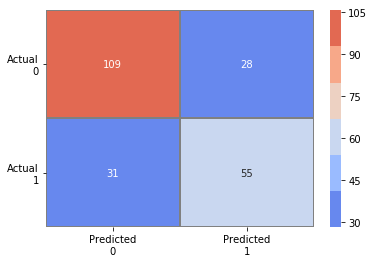

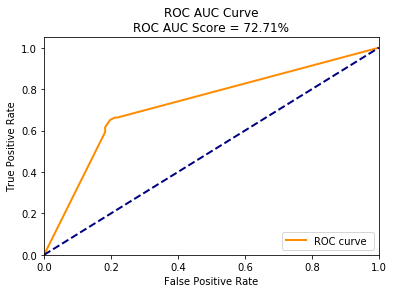

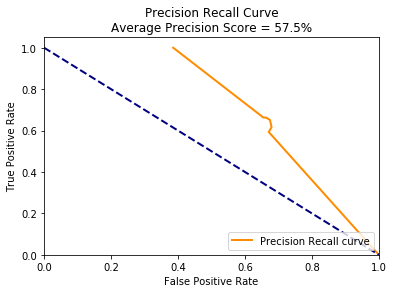

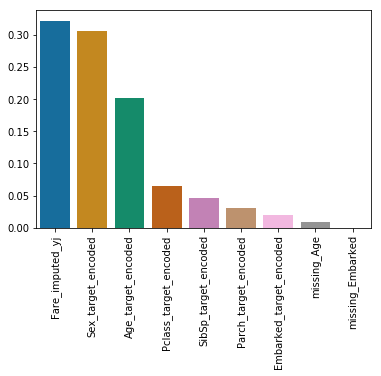

In [17]:
c.transformed_decision_tree()

In [ ]:
c.transformed_random_forest()

In [ ]:
c.transformed_gradient_booster()

In [ ]:
list(zip(c.train_transformed_data.columns,c._transformed_svm.coef_[0]))

In [ ]:
c.transformed_svm()

In [ ]:
c.test_transformed_data